<a href="https://colab.research.google.com/github/eliseobao/redsm5/blob/main/analysis/lexical/ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NER

In [1]:
import os

os.environ["SHELL"] = "/bin/bash"

In [2]:
%%capture
!pip install spacy
!python3 -m spacy download en_core_web_sm

In [12]:
import spacy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [4]:
SYMPTOMS = [
    "NO_SYMPTOMS",
    "DEPRESSED_MOOD",
    "ANHEDONIA",
    "APPETITE_CHANGE",
    "SLEEP_ISSUES",
    "PSYCHOMOTOR",
    "FATIGUE",
    "WORTHLESSNESS",
    "COGNITIVE_ISSUES",
    "SUICIDAL_THOUGHTS",
]

In [5]:
data = pd.read_csv("data/redsm5.csv")

texts_per_symptom = {}
for symptom in SYMPTOMS:
    texts_per_symptom[symptom] = data.loc[
        data["labels"].str.contains(symptom), "text"
    ].tolist()

In [6]:
def analyze_named_entities(text):
    """
    Analyze named entities in the given text.

    Parameters:
    - text (str): The input text to analyze.

    Returns:
    Tuple[dict, Union[tuple, None]]: A tuple containing:
        - A dictionary of named entity type percentages.
        - A tuple representing the most referenced named entity and its entity type, or None if no entities are found.
    """
    doc = nlp(text)

    named_entities = [(ent.text, ent.label_) for ent in doc.ents]

    if not named_entities:
        return {}, None

    entity_types = [ent_type for _, ent_type in named_entities]
    entity_type_counts = Counter(entity_types)

    total_entities = len(entity_types)
    entity_type_percentages = {
        ent_type: count / total_entities * 100
        for ent_type, count in entity_type_counts.items()
    }

    most_referenced_entity, _ = max(Counter(named_entities), key=lambda x: x[1])

    return entity_type_percentages, most_referenced_entity

In [7]:
results = {}
for symptom in SYMPTOMS:
    print(f"Analyzing {symptom} texts")
    results[symptom] = [
        analyze_named_entities(text) for text in tqdm(texts_per_symptom[symptom])
    ]

Analyzing NO_SYMPTOMS texts


100%|██████████| 392/392 [00:37<00:00, 10.55it/s]


Analyzing DEPRESSED_MOOD texts


100%|██████████| 328/328 [00:19<00:00, 16.57it/s]


Analyzing ANHEDONIA texts


100%|██████████| 124/124 [00:04<00:00, 26.33it/s]


Analyzing APPETITE_CHANGE texts


100%|██████████| 44/44 [00:02<00:00, 16.21it/s]


Analyzing SLEEP_ISSUES texts


100%|██████████| 102/102 [00:05<00:00, 19.00it/s]


Analyzing PSYCHOMOTOR texts


100%|██████████| 35/35 [00:02<00:00, 14.60it/s]


Analyzing FATIGUE texts


100%|██████████| 124/124 [00:07<00:00, 16.06it/s]


Analyzing WORTHLESSNESS texts


100%|██████████| 311/311 [00:16<00:00, 19.21it/s]


Analyzing COGNITIVE_ISSUES texts


100%|██████████| 59/59 [00:02<00:00, 24.62it/s]


Analyzing SUICIDAL_THOUGHTS texts


100%|██████████| 165/165 [00:07<00:00, 22.71it/s]


In [23]:
for symptom, result in results.items():
    total_entity_type_percentages = Counter()
    most_referenced_entities = {}

    for entity_type_percentages, most_referenced_entity in result:
        total_entity_type_percentages.update(entity_type_percentages)

        if most_referenced_entity:
            most_referenced_entities[
                texts_per_symptom[symptom][
                    result.index((entity_type_percentages, most_referenced_entity))
                ]
            ] = most_referenced_entity

    total_entities_across_texts = sum(total_entity_type_percentages.values())
    overall_entity_type_percentages = {
        ent_type: count / total_entities_across_texts * 100
        for ent_type, count in total_entity_type_percentages.items()
    }

    print(f"\n{symptom}")
    for ent_type, percentage in overall_entity_type_percentages.items():
        print(f"{ent_type}: {percentage:.2f}%")


NO_SYMPTOMS
ORG: 8.76%
DATE: 33.57%
CARDINAL: 15.16%
ORDINAL: 5.63%
GPE: 4.21%
PERCENT: 1.91%
TIME: 11.95%
QUANTITY: 0.80%
PERSON: 13.92%
NORP: 1.19%
PRODUCT: 0.77%
FAC: 0.38%
LANGUAGE: 0.04%
WORK_OF_ART: 0.53%
LOC: 0.24%
LAW: 0.13%
MONEY: 0.80%
EVENT: 0.01%

DEPRESSED_MOOD
ORG: 6.84%
DATE: 47.17%
CARDINAL: 16.14%
PERSON: 8.37%
TIME: 8.50%
GPE: 3.48%
ORDINAL: 4.71%
NORP: 1.39%
FAC: 0.08%
MONEY: 0.66%
PRODUCT: 0.45%
LOC: 0.43%
EVENT: 0.02%
PERCENT: 0.63%
QUANTITY: 0.62%
WORK_OF_ART: 0.37%
LANGUAGE: 0.02%
LAW: 0.11%

ANHEDONIA
ORDINAL: 3.16%
DATE: 49.84%
CARDINAL: 18.89%
PERSON: 5.29%
TIME: 7.06%
ORG: 8.90%
LOC: 0.37%
GPE: 3.05%
NORP: 1.27%
QUANTITY: 0.65%
MONEY: 0.18%
PERCENT: 0.45%
PRODUCT: 0.73%
EVENT: 0.10%
LANGUAGE: 0.08%

APPETITE_CHANGE
CARDINAL: 19.98%
ORG: 9.56%
GPE: 1.86%
DATE: 46.94%
TIME: 6.19%
QUANTITY: 2.17%
PERSON: 6.64%
ORDINAL: 4.32%
PERCENT: 0.61%
LOC: 0.08%
FAC: 0.08%
MONEY: 0.34%
NORP: 0.55%
EVENT: 0.67%

SLEEP_ISSUES
TIME: 33.17%
CARDINAL: 13.97%
ORG: 6.01%
DATE: 31

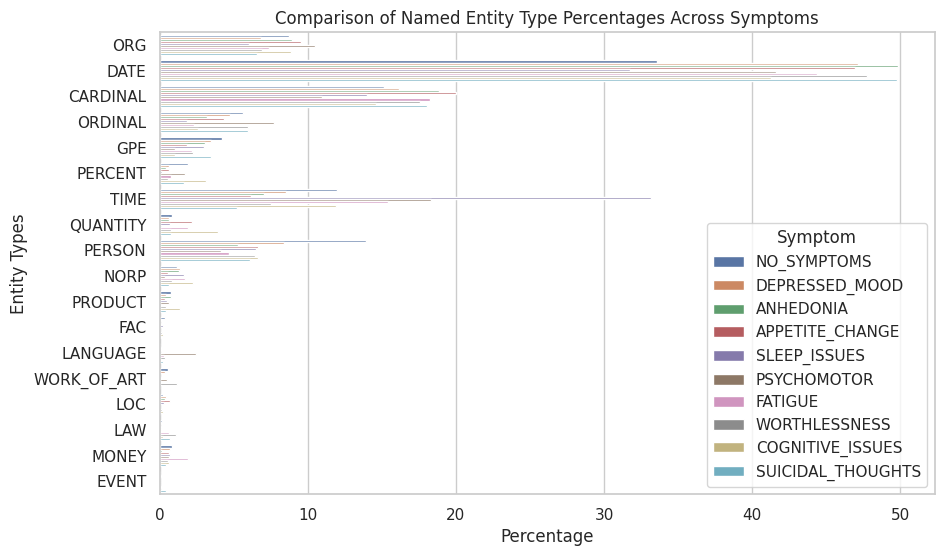

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data in dictionary format
data = {
    "Entity Type": ["ORG", "DATE", "CARDINAL", "ORDINAL", "GPE", "PERCENT", "TIME", "QUANTITY", "PERSON", "NORP", "PRODUCT", "FAC", "LANGUAGE", "WORK_OF_ART", "LOC", "LAW", "MONEY", "EVENT"],
    "NO_SYMPTOMS": [8.76, 33.57, 15.16, 5.63, 4.21, 1.91, 11.95, 0.80, 13.92, 1.19, 0.77, 0.38, 0.04, 0.53, 0.24, 0.13, 0.80, 0.01],
    "DEPRESSED_MOOD": [6.84, 47.17, 16.14, 4.71, 3.48, 0.63, 8.50, 0.62, 8.37, 1.39, 0.45, 0.08, 0.02, 0.37, 0.43, 0.11, 0.66, 0.02],
    "ANHEDONIA": [8.90, 49.84, 18.89, 3.16, 3.05, 0.45, 7.06, 0.65, 5.29, 1.27, 0.73, 0.00, 0.08, 0.00, 0.37, 0.00, 0.18, 0.10],
    "APPETITE_CHANGE": [9.56, 46.94, 19.98, 4.32, 1.86, 0.61, 6.19, 2.17, 6.64, 0.55, 0.34, 0.08, 0.08, 0.00, 0.67, 0.08, 0.61, 0.00],
    "SLEEP_ISSUES": [6.01, 31.78, 13.97, 1.84, 2.99, 0.17, 33.17, 0.71, 6.53, 1.66, 0.50, 0.22, 0.01, 0.07, 0.27, 0.10, 0.71, 0.01],
    "PSYCHOMOTOR": [10.50, 41.58, 10.94, 7.72, 1.01, 1.73, 18.29, 0.05, 4.13, 0.33, 0.60, 0.03, 2.46, 0.47, 0.05, 0.10, 0.60, 0.05],
    "FATIGUE": [7.41, 44.40, 18.28, 2.30, 2.21, 0.76, 15.41, 1.90, 4.65, 1.71, 0.07, 0.02, 0.27, 0.07, 0.02, 0.60, 1.90, 0.00],
    "WORTHLESSNESS": [6.91, 47.75, 17.55, 5.94, 2.27, 0.58, 7.54, 0.76, 6.42, 0.84, 0.40, 0.16, 0.36, 1.16, 0.17, 1.10, 0.58, 0.11],
    "COGNITIVE_ISSUES": [8.85, 41.27, 14.62, 2.56, 1.00, 3.10, 11.93, 3.95, 6.63, 2.22, 1.35, 0.22, 0.08, 0.00, 0.22, 0.22, 0.60, 0.00],
    "SUICIDAL_THOUGHTS": [6.60, 49.80, 18.07, 5.97, 3.48, 1.61, 5.21, 0.76, 6.07, 0.62, 0.43, 0.07, 0.19, 0.00, 0.05, 0.72, 0.42, 0.43]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert from wide to long format
df_melted = df.melt(id_vars=["Entity Type"], var_name="Symptom", value_name="Percentage")

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x="Percentage", y="Entity Type", hue="Symptom")

# Title and labels
plt.title("Comparison of Named Entity Type Percentages Across Symptoms")
plt.xlabel("Percentage")
plt.ylabel("Entity Types")
plt.legend(title="Symptom")

# Show the plot
plt.show()
